# Урок 1. Создание признакового пространства

## Домашнее задание. Вариант 2

Все материалы для выполения дз в `sem2.ipynb` он находится в архиве `Lesson-2.zip`.  
Для скачивания данных пользуйтесь этими ссылками:

https://disk.yandex.ru/i/v5HM-ENiGXZVpQ  
https://disk.yandex.ru/i/koR5eMCToCZS2Q

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [3]:
import nltk
from nltk import ngrams
from nltk import collocations
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('genesis')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\demin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\demin\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\demin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from string import punctuation
noise = stopwords.words('russian') + list(punctuation)

In [5]:
from collections import Counter

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
positive = pd.read_csv('17_2_files/positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('17_2_files/negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = pd.concat([positive, negative], ignore_index=True)

In [7]:
df.tail()

,text,label
226829,Но не каждый хочет что то исправлять:( http://...,negative
226830,скучаю так :-( только @taaannyaaa вправляет мо...,negative
226831,"Вот и в школу, в говно это идти уже надо(",negative
226832,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
226833,Такси везет меня на работу. Раздумываю приплат...,negative


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [9]:
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:15]

2870536


['first_timee',
 'хоть',
 'я',
 'и',
 'школота',
 'но',
 'поверь',
 'у',
 'нас',
 'то',
 'же',
 'самое',
 'D',
 'общество',
 'профилирующий']

In [10]:
freq_dict = Counter(corpus)
freq_dict_sorted = sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:15]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860),
 ('...', 22363),
 ('меня', 20656),
 ('у', 18928),
 ('как', 18279),
 ('так', 16839)]

### Задание 1. Обучите три классификатора:

1) на токенах с высокой частотой

2) на токенах со средней частотой

3) на токенах с низкой частотой

Сравните полученные результаты, оцените какие токены наиболее важные для классификации.

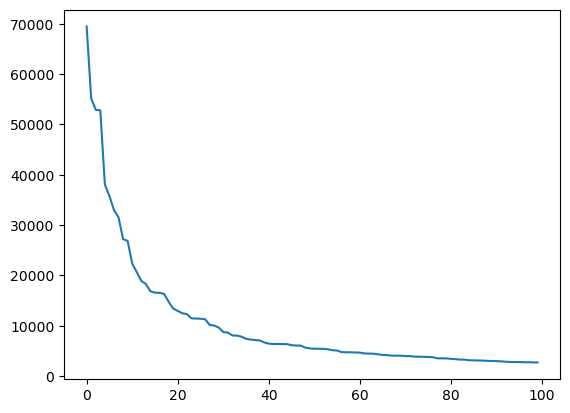

In [12]:
first_part_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_part_freqs)
plt.show()

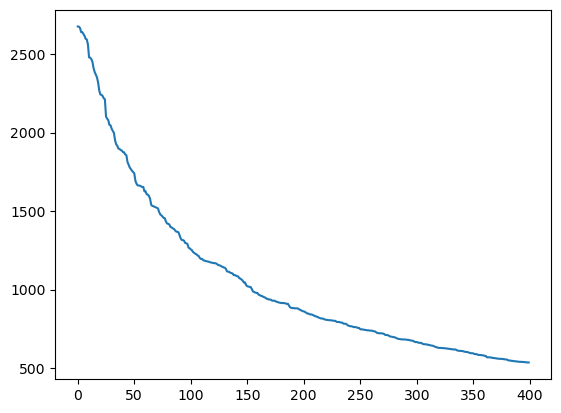

In [13]:
first_part_freqs = [freq for word, freq in freq_dict_sorted[100:500]]
plt.plot(first_part_freqs)
plt.show()

In [14]:
high_tokens = set()
med_tokens = set()
low_tokens = set()
h = 17000
l = 1000
for i in freq_dict_sorted:
    if i[1] > h:
        high_tokens.add(i[0])
    elif i[1] < l:
        low_tokens.add(i[0])
    else:
        med_tokens.add(i[0])
print(len(high_tokens), len(med_tokens), len(low_tokens))

14 241 350868


In [15]:
sw = noise + list(low_tokens) + list(med_tokens)

In [18]:
%%time
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=sw)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.87      0.56      0.68     43163
    positive       0.34      0.73      0.47     13546

    accuracy                           0.60     56709
   macro avg       0.61      0.64      0.57     56709
weighted avg       0.74      0.60      0.63     56709

Wall time: 1min 7s


In [19]:
sw = noise + list(high_tokens) + list(low_tokens)

In [20]:
%%time
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=sw)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.49      0.66      0.56     20579
    positive       0.76      0.60      0.67     36130

    accuracy                           0.63     56709
   macro avg       0.62      0.63      0.62     56709
weighted avg       0.66      0.63      0.63     56709

Wall time: 1min 8s


In [21]:
sw = noise + list(high_tokens) + list(med_tokens)

In [22]:
%%time
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=sw)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.79      0.74      0.77     29918
    positive       0.73      0.78      0.76     26791

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709

Wall time: 51.2 s


#### Вывод:

Лучшая точность получилась на токенах с низкой частотностью.


### Задание 2. Найти фичи с наибольшей значимостью, и вывести их

In [24]:
%%time
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=stopwords.words('russian'))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27881
    positive       1.00      1.00      1.00     28828

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709

Wall time: 50.3 s


In [25]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
p = list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
p

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [40]:
new_filter = stopwords.words('russian') + p

In [28]:
%%time
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=new_filter)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.77      0.77      0.77     27919
    positive       0.78      0.78      0.78     28790

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709

Wall time: 48.8 s


In [30]:
cool_token = ')'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.85      0.92     32773
    positive       0.83      1.00      0.91     23936

    accuracy                           0.91     56709
   macro avg       0.92      0.93      0.91     56709
weighted avg       0.93      0.91      0.92     56709



In [32]:
punkt_tokens = []
for i in punctuation:
    cool_token = i
    pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
    punkt_tokens.append((i,accuracy_score(pred, y_test)))
print(punkt_tokens)

[('!', 0.5164435980179513), ('"', 0.5050521081309844), ('#', 0.502759703045372), ('$', 0.4927436562097727), ('%', 0.4948597224426458), ('&', 0.49276129009504666), ("'", 0.492655486783403), ('(', 0.025868909696873513), (')', 0.9147754324710363), ('*', 0.5108360225008376), ('+', 0.49337847607963464), (',', 0.502442293110441), ('-', 0.5089668306617997), ('.', 0.5074855842987885), ('/', 0.5442346012096845), (':', 0.5422948738295509), (';', 0.49600592498545204), ('<', 0.4926907545539509), ('=', 0.49272602232449875), ('>', 0.4926907545539509), ('?', 0.5025833641926326), ('@', 0.5648662469801972), ('[', 0.492655486783403), ('\\', 0.4926907545539509), (']', 0.4927436562097727), ('^', 0.4987391772029131), ('_', 0.5161967236241161), ('`', 0.49239097850429386), ('{', 0.492655486783403), ('|', 0.48868786259676594), ('}', 0.4926907545539509), ('~', 0.4925849512423072)]


#### Most important features:

In [34]:
for i in sorted(punkt_tokens, key=lambda x: -x[1])[:10]:
    print(i[0], ' - ', i[1])

)  -  0.9147754324710363
@  -  0.5648662469801972
/  -  0.5442346012096845
:  -  0.5422948738295509
!  -  0.5164435980179513
_  -  0.5161967236241161
*  -  0.5108360225008376
-  -  0.5089668306617997
.  -  0.5074855842987885
"  -  0.5050521081309844


### Задание 3.
1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера

3) убедиться что для сетки нет переобучения

In [43]:
new_filter = stopwords.words('russian') + p

In [44]:
%%time
count_vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=new_filter)
bow = count_vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(count_vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.80      0.76      0.78     29208
    positive       0.76      0.80      0.78     27501

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709

Wall time: 41.2 s


In [45]:
new_filter = stopwords.words('russian')

In [46]:
%%time
tfidf_vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=new_filter)
bow = tfidf_vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(tfidf_vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27881
    positive       1.00      1.00      1.00     28828

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709

Wall time: 40.6 s


In [47]:
%%time
hash_vec = HashingVectorizer(n_features=2**4,)
bow = hash_vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(hash_vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.51      0.54      0.52     26261
    positive       0.58      0.55      0.56     30448

    accuracy                           0.55     56709
   macro avg       0.54      0.55      0.54     56709
weighted avg       0.55      0.55      0.55     56709

Wall time: 3.92 s


In [48]:
%%time
hash_vec = HashingVectorizer(n_features=2**8,)
bow = hash_vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(hash_vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.60      0.61      0.60     27374
    positive       0.63      0.62      0.62     29335

    accuracy                           0.61     56709
   macro avg       0.61      0.61      0.61     56709
weighted avg       0.61      0.61      0.61     56709

Wall time: 4.4 s


In [49]:
%%time
hash_vec = HashingVectorizer(n_features=2**12,)
bow = hash_vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(hash_vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.68      0.69      0.68     27426
    positive       0.71      0.69      0.70     29283

    accuracy                           0.69     56709
   macro avg       0.69      0.69      0.69     56709
weighted avg       0.69      0.69      0.69     56709

Wall time: 5.92 s


In [50]:
%%time
hash_vec = HashingVectorizer(n_features=2**14,)
bow = hash_vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(hash_vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.71      0.72      0.72     27328
    positive       0.74      0.72      0.73     29381

    accuracy                           0.72     56709
   macro avg       0.72      0.72      0.72     56709
weighted avg       0.72      0.72      0.72     56709

Wall time: 6.29 s


In [51]:
%%time
hash_vec = HashingVectorizer(n_features=2**16,)
bow = hash_vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit (bow, y_train)
pred = clf.predict(hash_vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.72      0.75      0.73     27011
    positive       0.76      0.74      0.75     29698

    accuracy                           0.74     56709
   macro avg       0.74      0.74      0.74     56709
weighted avg       0.74      0.74      0.74     56709

Wall time: 6.65 s
